In [3]:
import sys
sys.path.append("/content/drive/MyDrive/Soumaya - PFE/results/Code_Test/Pretrained_models+Unet/")
from load_models import *

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import array_to_img
from random import seed
from random import randint
!mkdir images

Chargement des modèles ...
Chargement de InceptionV3 avec masque ...
Chargement de MobileNet avec masque ...
Chargement de ResNet50 avec masque ...
Chargement de vgg16 avec masque ...
Chargement de vgg19 avec masque ...
Chargement de InceptionV3 sans masque sans augmentation ...
Chargement de MobileNet sans masque sans augmentation ...
Chargement de ResNet50 sans masque sans augmentation ...
Chargement de VGG16 sans masque sans augmentation ...
Chargement de VGG19 sans masque sans augmentation ...
Chargement de InceptionV3 sans masque avec augmentation ...
Chargement de MobileNet sans masque avec augmentation ...
Chargement de ResNet50 sans masque avec augmentation ...
Chargement de VGG16 sans masque avec augmentation ...
Chargement de VGG19 sans masque avec augmentation ...
Chargement du modèle U-Net ...
Le chargement des mdèles est terminé avec succès.


In [4]:
def get_model(model_name,detection_type,augmentation=None):
    if(detection_type=="mask_classification"):
        return mask_models[model_name]
    elif(detection_type=="no_mask_classification"):
        if(augmentation=="augmentation"):
            return aug_models[model_name]
        elif(augmentation=="no_augmentation"):
            return no_aug_models[model_name]

    
def load_image(img_path, show=True,img_size=224,rescale=True):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)
    if rescale==True:
        img_tensor /= 255.                                 
    if show:
        if rescale==True:
            plt.imshow(img_tensor[0])  
        else:
            new_im=img_tensor / 255. 
            plt.imshow(new_im[0]) 
        plt.axis('off')
        plt.show()
    return img_tensor

def prediction_classification(model_name,img_path,detection_type,augmentation=None):
    if model_name!="U-Net":
      model = get_model(model_name,detection_type,augmentation)
      if(model_name=="InceptionV3"):
          image_size=299
      else:
          image_size=224
      if(model_name=="VGG16" or model_name=="VGG19") and (augmentation=="augmentation"):
          resc=False
      else:
          resc=True
      new_image = load_image(img_path,img_size=image_size,rescale=resc)
      # prediction
      pred = model.predict(new_image)
  #     print(pred)
      res={}
      res['model_name']=str(model_name)
      if(model_name=="VGG16" or model_name=="VGG19") and (augmentation=="augmentation"):
          if(pred[0][0]>0.5):
              res['accuracy']=round(pred[0][0]*100,5)
              res['test']='un Tumeur detecté"'
          else:
              res['accuracy']=100-round(pred[0][0]*100,5)
              res['test']='Aucun Tumeur detecté'
      else:
          preds = np.argmax(pred, axis=1)
  #         print(preds)
          if(preds==0):
              res['accuracy']=round(pred[0][0]*100,5)
              res['test']='Aucun Tumeur detecté'
          else:
              res['accuracy']=round(pred[0][1]*100,5)
              res['test']='un Tumeur detecté'
      print("Test: ",res['test'])
      print("Précision: ",res['accuracy'],"%")
      print("Modèle: ",res['model_name'])
      if detection_type=="mask_classification":
          print("Classification: avec masque")
      else:
          print("Classification: sans masque")
      if augmentation=="augmentation":
          print("Augmentation: Oui")
      elif augmentation=="no_augmentation":
          print("Augmentation: Non")
      # return res
    else:
      unet_prediction(img_path)

def unet_prediction(imgPath):
    seed(1)
    value = randint(0, 1000)
    image = cv2.imread(imgPath)
    ImgHieght = 256
    ImgWidth = 256
    img = cv2.resize(image ,(ImgHieght, ImgWidth))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=unet.predict(img)
    im=np.squeeze(pred)
    new_img_path="/content/images/unet_"+str(value)+os.path.basename(imgPath)
    cv2.imwrite(new_img_path,im)
    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(im)
    plt.title('predicted Image')
    plt.show()

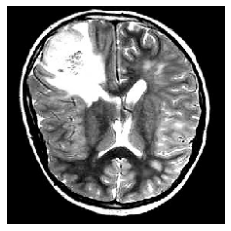

Test:  un Tumeur detecté
Précision:  99.99999 %
Modèle:  ResNet50
Classification: sans masque
Augmentation: Non


In [9]:
modelname="ResNet50"
imgname="/content/drive/MyDrive/Soumaya - PFE/classification models/new_dataset/TEST/YES/y0.jpg"
detectiontype="no_mask_classification"
aug="no_augmentation"
prediction_classification(model_name=modelname,img_path=imgname,detection_type=detectiontype,augmentation=aug)

In [ ]:
# InceptionV3
# ResNet50
# MobileNet
# VGG16
# VGG19
# U-Net